<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/Alameda%26Sacramento_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALAMEDA COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Alameda_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Alameda_County.csv to Alameda_County (1).csv
            Alameda County
Dates                     
2000-01-31        293203.0
2000-02-29        294671.0
2000-03-31        296953.0
2000-04-30        305678.0
2000-05-31        317539.0
...                    ...
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Alameda County
Dates,
2000-01-31,293203.0
2000-02-29,294671.0
2000-03-31,296953.0
2000-04-30,305678.0
2000-05-31,317539.0
...,...
2021-12-31,1183393.0
2022-01-31,1202969.0
2022-02-28,1226211.0


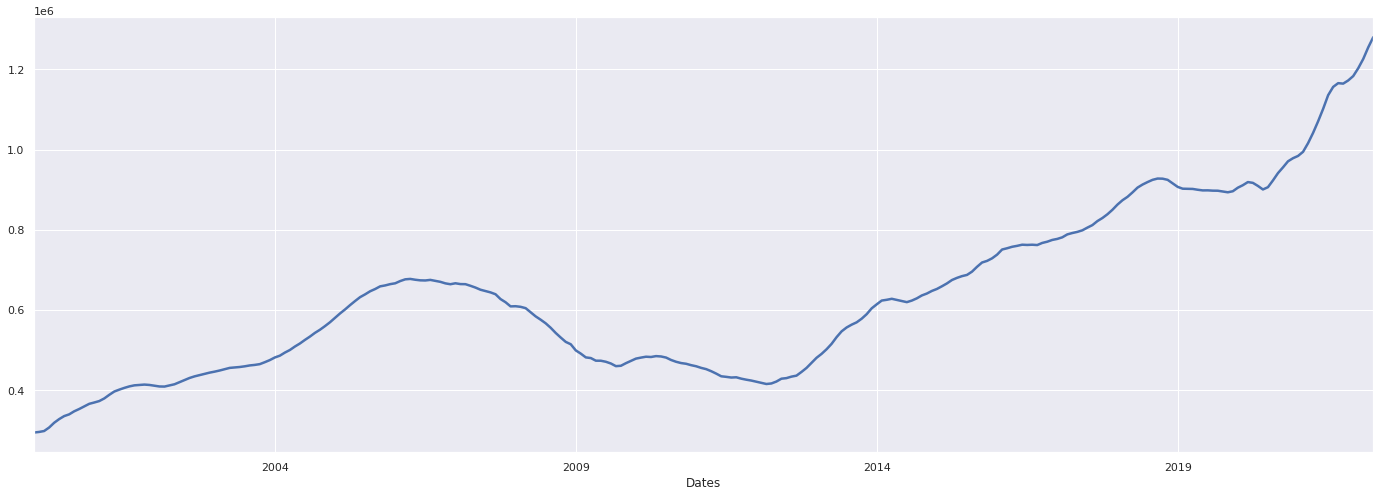

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Alameda County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Alameda County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


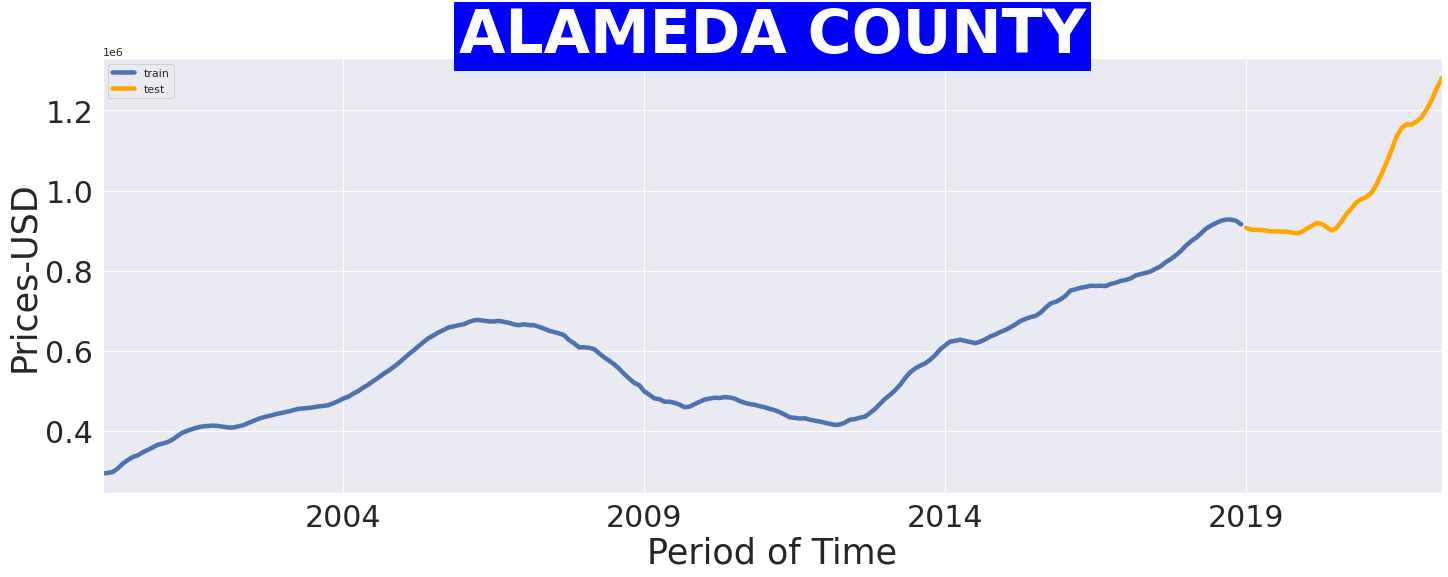

In [ ]:
RealData_df['Alameda County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Alameda County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("ALAMEDA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 4s 32ms/step - loss: 0.1444 - mean_absolute_error: 0.3199 - val_loss: 0.7685 - val_mean_absolute_error: 0.8373
Epoch 2/60
46/46 [==============================] - 1s 11ms/step - loss: 0.0332 - mean_absolute_error: 0.1399 - val_loss: 0.1144 - val_mean_absolute_error: 0.3027
Epoch 3/60
46/46 [==============================] - 1s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0334 - val_loss: 0.0139 - val_mean_absolute_error: 0.0879
Epoch 4/60
46/46 [==============================] - 1s 13ms/step - loss: 0.0012 - mean_absolute_error: 0.0271 - val_loss: 0.0079 - val_mean_absolute_error: 0.0698
Epoch 5/60
46/46 [==============================] - 1s 13ms/step - loss: 0.0012 - mean_absolute_error: 0.0274 - val_loss: 0.0062 - val_mean_absolute_error: 0.0618
Epoch 6/60
46/46 [==============================] - 1s 13ms/step - loss: 0.0011 - mean_absolute_error: 0.0266 - val_loss: 0.0038 - val_mean_absolute_error: 0.0544
Epoch 7/60
46/46 [====

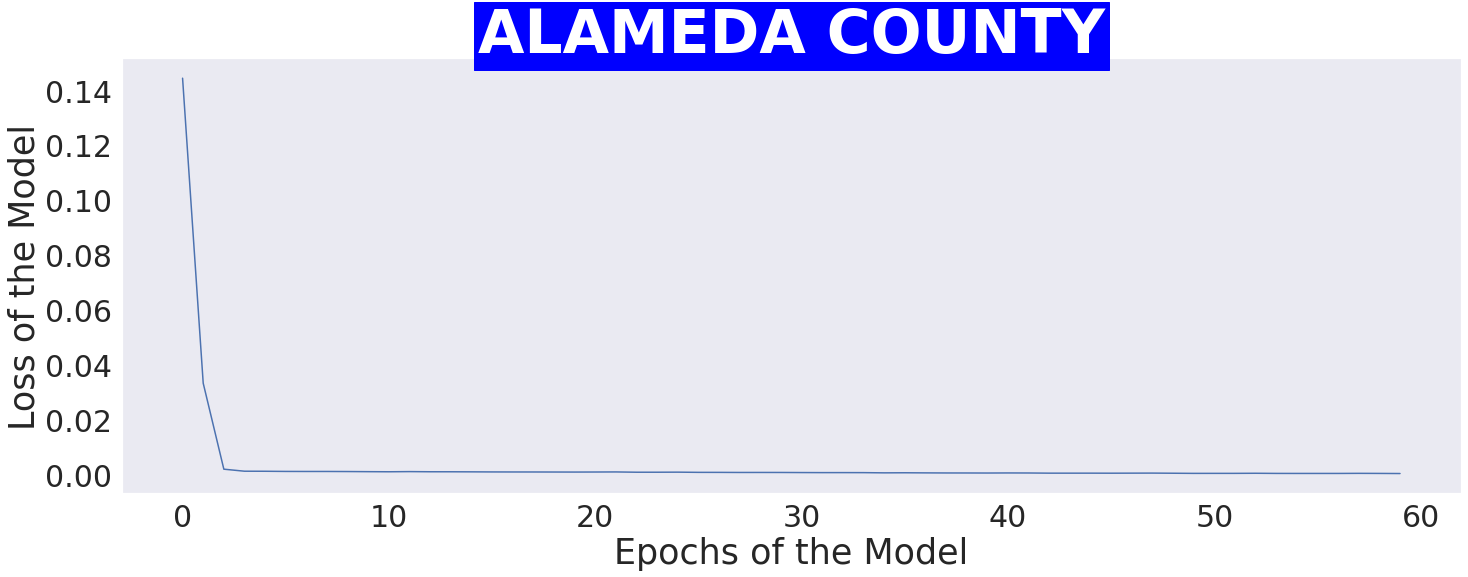

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("ALAMEDA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.9851477 , 0.9818617 , 0.9806441 , 0.9751356 , 0.96965903,
       0.96903753, 0.96715105, 0.9662785 , 0.9609008 , 0.95472306,
       0.96042454, 0.9849404 , 1.0062344 , 1.0297816 , 1.029898  ,
       1.0093302 , 0.9817038 , 0.9908364 , 1.036941  , 1.0922917 ,
       1.138905  , 1.1843252 , 1.213699  , 1.2324903 , 1.2595963 ,
       1.3137999 , 1.3845876 , 1.4636265 , 1.5481523 , 1.6384023 ,
       1.7098383 , 1.7486776 , 1.7583346 , 1.7686924 , 1.7943126 ,
       1.8356525 , 1.8919567 , 1.9595538 ], dtype=float32)

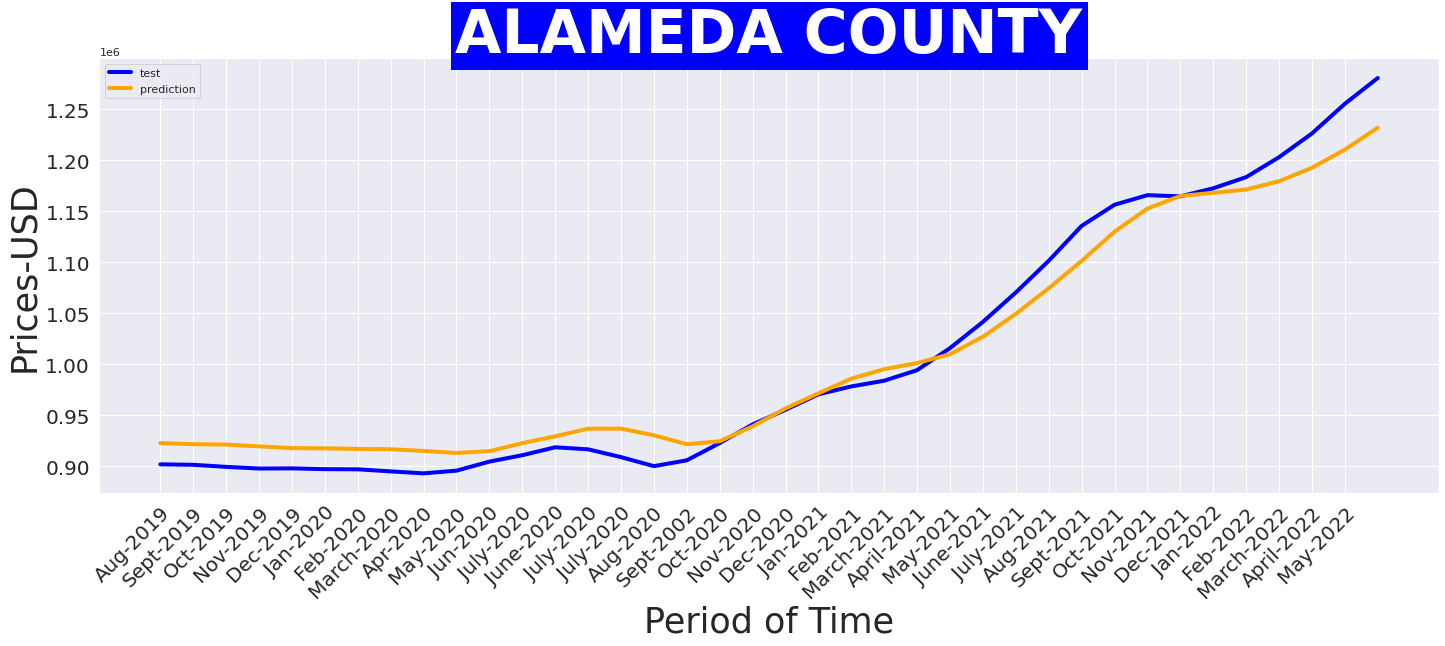

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ALAMEDA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'ALAMEDA COUNTY')

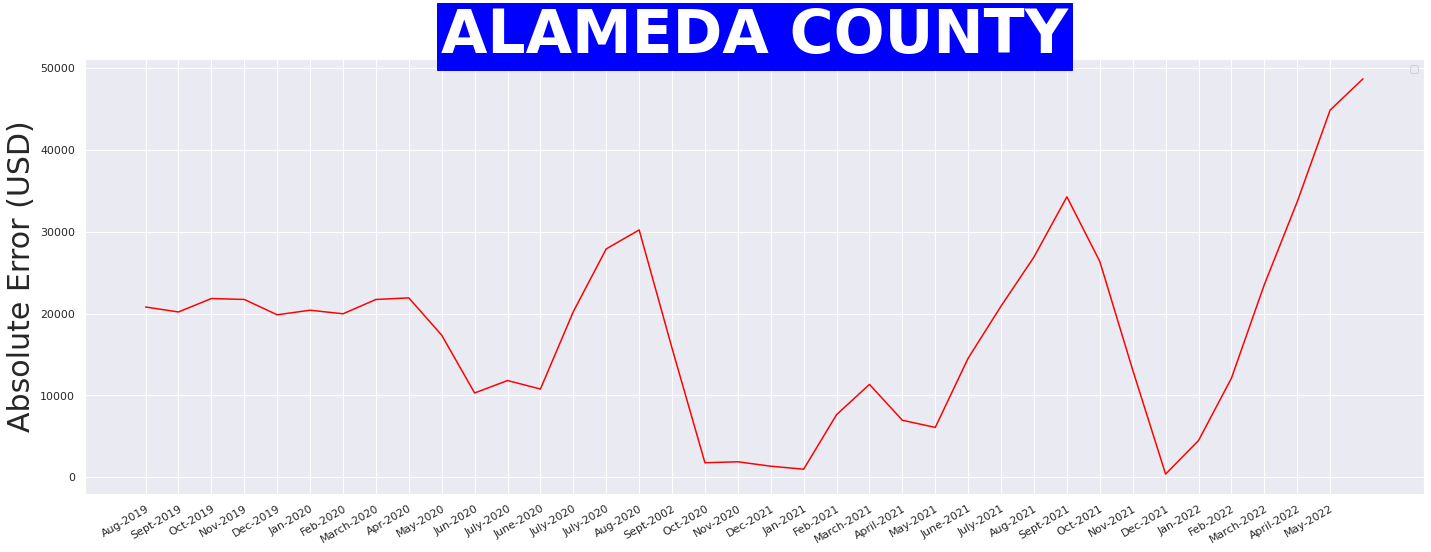

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("ALAMEDA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[ 922798.56],
       [ 921756.4 ],
       [ 921370.2 ],
       [ 919623.2 ],
       [ 917886.25],
       [ 917689.2 ],
       [ 917090.9 ],
       [ 916814.1 ],
       [ 915108.6 ],
       [ 913149.25],
       [ 914957.5 ],
       [ 922732.8 ],
       [ 929486.3 ],
       [ 936954.4 ],
       [ 936991.25],
       [ 930468.06],
       [ 921706.3 ],
       [ 924602.75],
       [ 939225.  ],
       [ 956779.56],
       [ 971563.2 ],
       [ 985968.3 ],
       [ 995284.25],
       [1001244.  ],
       [1009840.8 ],
       [1027031.6 ],
       [1049482.1 ],
       [1074549.5 ],
       [1101357.1 ],
       [1129980.2 ],
       [1152636.4 ],
       [1164954.4 ],
       [1168017.1 ],
       [1171302.1 ],
       [1179427.6 ],
       [1192538.6 ],
       [1210395.8 ],
       [1231834.4 ]], dtype=float32)

# **SACRAMENTO COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Sacramento_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Sacramento_County.csv to Sacramento_County.csv
            Sacramento County
Dates                        
2000-01-31           155548.0
2000-02-29           156179.0
2000-03-31           156969.0
2000-04-30           158355.0
2000-05-31           159850.0
...                       ...
NaT                       NaN
NaT                       NaN
NaT                       NaN
NaT                       NaN
NaT                       NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Sacramento County
Dates,
2000-01-31,155548.0
2000-02-29,156179.0
2000-03-31,156969.0
2000-04-30,158355.0
2000-05-31,159850.0
...,...
2021-12-31,528226.0
2022-01-31,536819.0
2022-02-28,545978.0


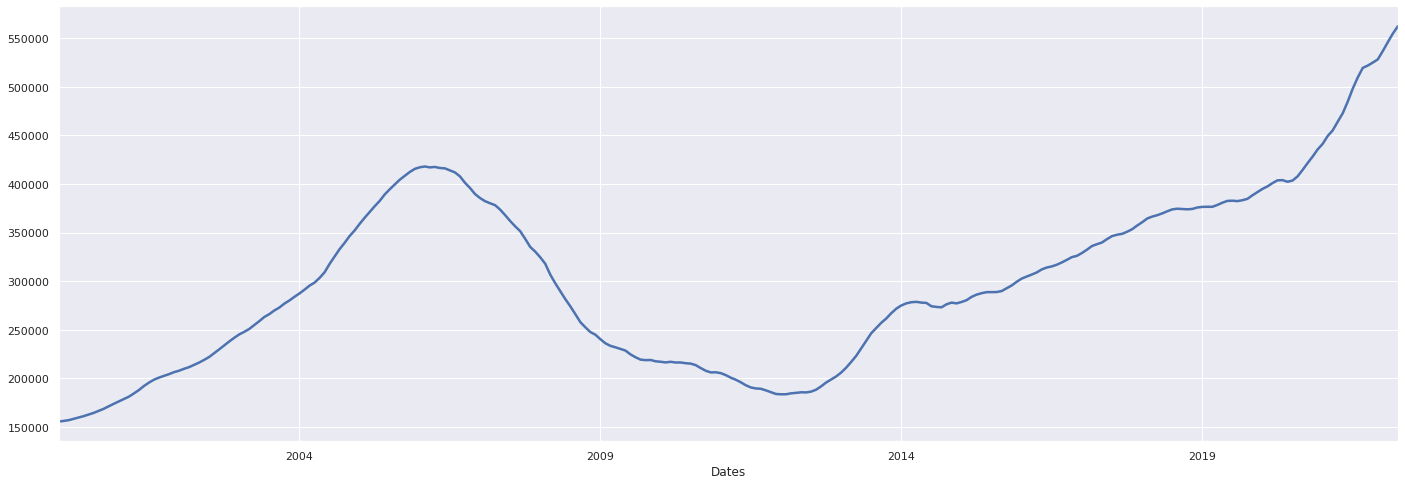

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Sacramento County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Sacramento County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


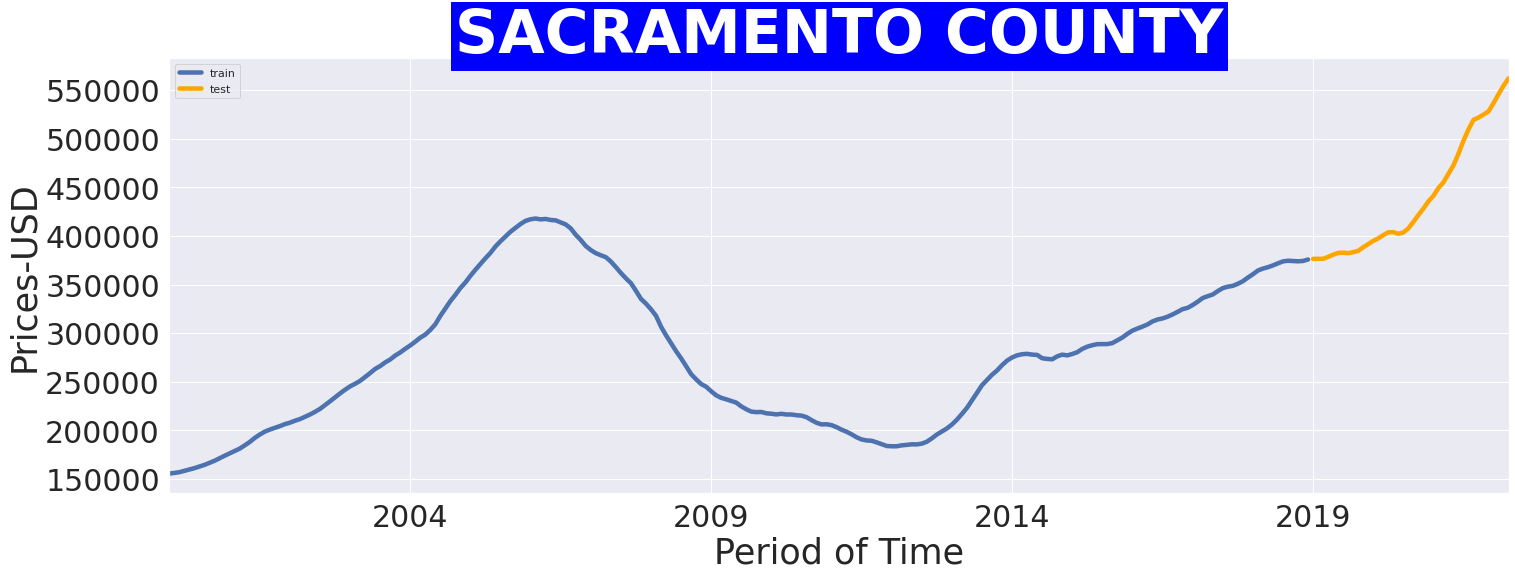

In [ ]:
RealData_df['Sacramento County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Sacramento County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SACRAMENTO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 24ms/step - loss: 0.2032 - mean_absolute_error: 0.3789 - val_loss: 0.6521 - val_mean_absolute_error: 0.7571
Epoch 2/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.1542 - val_loss: 0.0404 - val_mean_absolute_error: 0.1674
Epoch 3/60
46/46 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0396 - val_loss: 0.0152 - val_mean_absolute_error: 0.0902
Epoch 4/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0390 - val_loss: 0.0215 - val_mean_absolute_error: 0.1112
Epoch 5/60
46/46 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0391 - val_loss: 0.0202 - val_mean_absolute_error: 0.1094
Epoch 6/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0384 - val_loss: 0.0060 - val_mean_absolute_error: 0.0598
Epoch 7/60
46/46 [=========

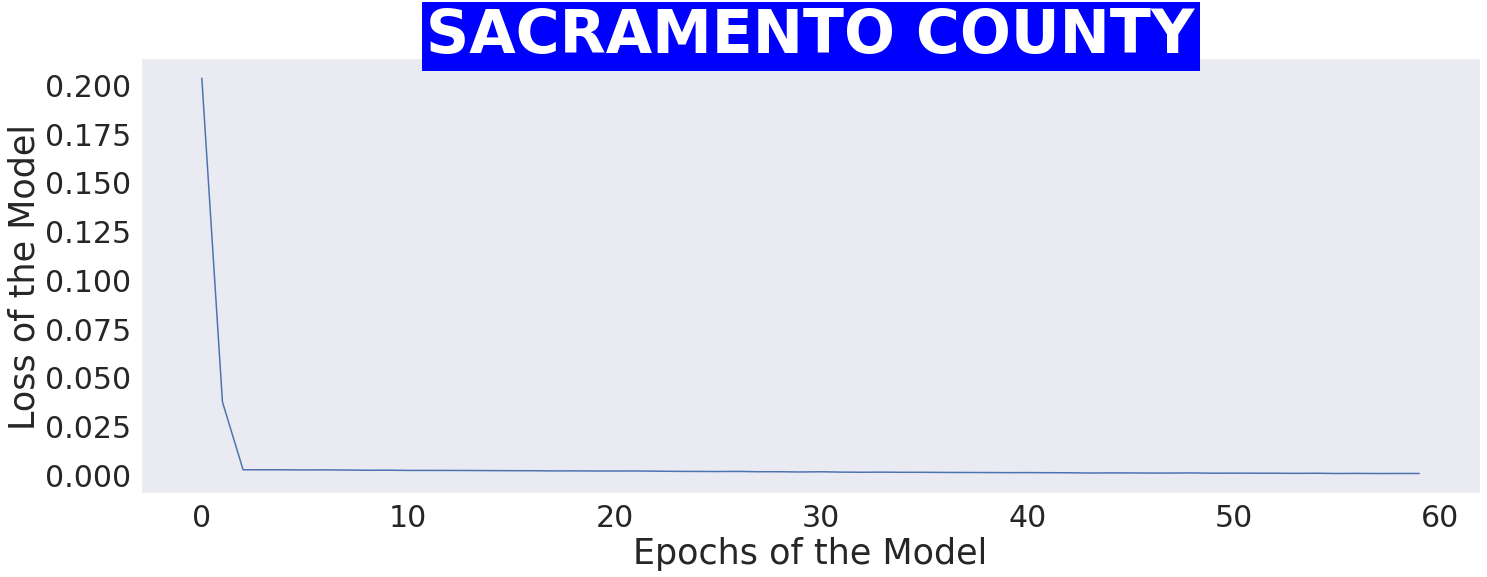

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SACRAMENTO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.68635774, 0.68546104, 0.70651186, 0.7254268 , 0.7380932 ,
       0.73450696, 0.7290457 , 0.7403997 , 0.7530891 , 0.7882178 ,
       0.81223726, 0.8377167 , 0.85528266, 0.8840434 , 0.90437883,
       0.89770764, 0.8789341 , 0.8979427 , 0.94056493, 0.9995413 ,
       1.0559239 , 1.107453  , 1.1675894 , 1.2089142 , 1.2797773 ,
       1.320809  , 1.4010869 , 1.4715996 , 1.577597  , 1.6910137 ,
       1.7850119 , 1.8665307 , 1.8779395 , 1.9056512 , 1.9351596 ,
       2.0155895 , 2.0964372 , 2.1740406 ], dtype=float32)

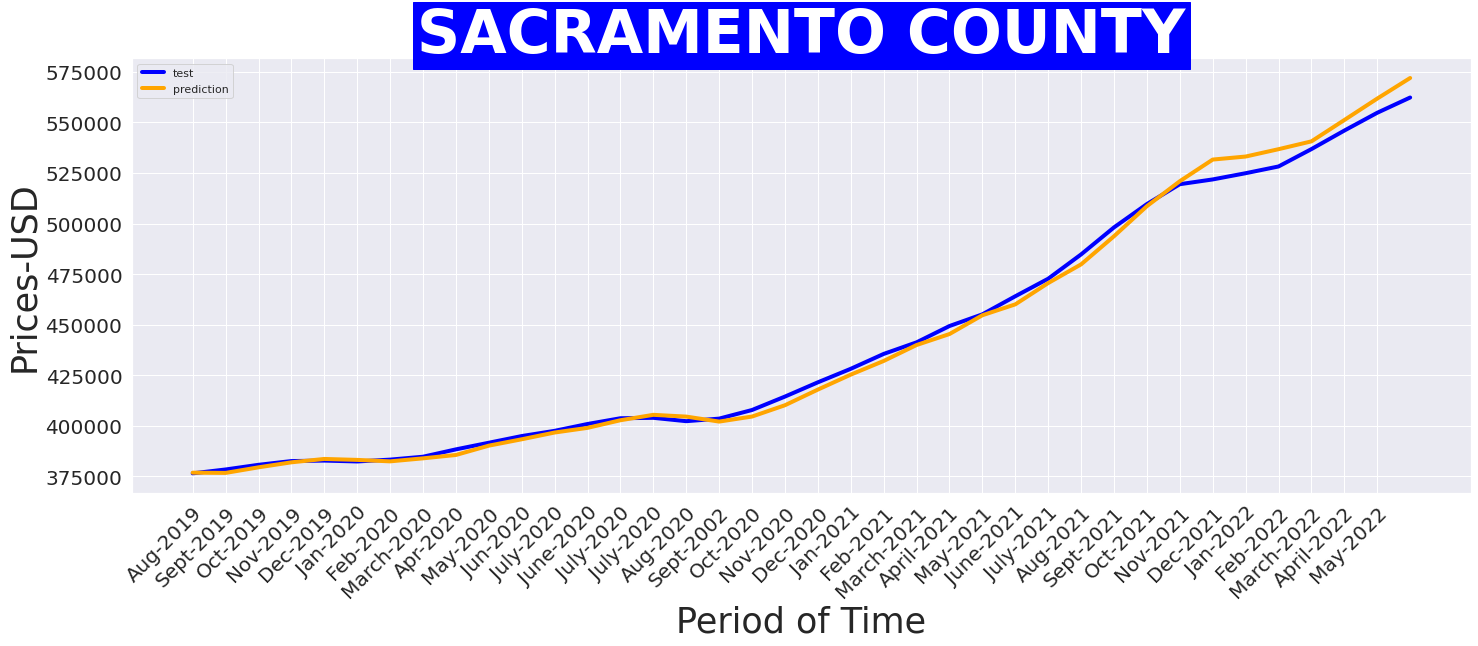

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("SACRAMENTO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SACRAMENTO COUNTY')

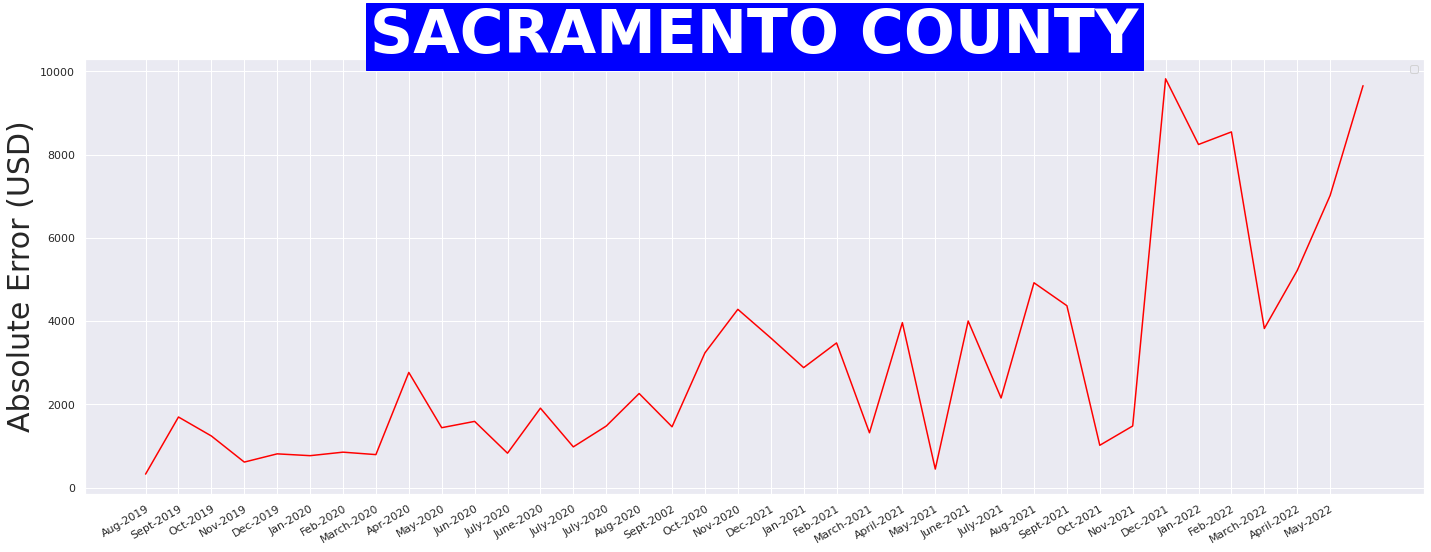

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SACRAMENTO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[376798.97],
       [376681.34],
       [379443.2 ],
       [381924.84],
       [383586.7 ],
       [383116.16],
       [382399.66],
       [383889.3 ],
       [385554.16],
       [390163.06],
       [393314.44],
       [396657.34],
       [398962.  ],
       [402735.44],
       [405403.47],
       [404528.2 ],
       [402065.1 ],
       [404559.03],
       [410151.1 ],
       [417888.8 ],
       [425286.25],
       [432046.88],
       [439936.8 ],
       [445358.62],
       [454655.94],
       [460039.28],
       [470571.78],
       [479823.1 ],
       [493730.  ],
       [508610.34],
       [520942.94],
       [531638.25],
       [533135.1 ],
       [536770.94],
       [540642.4 ],
       [551194.9 ],
       [561802.1 ],
       [571983.7 ]], dtype=float32)